# The Iris DataSet

This is my first attempt at utilizing machine learning techniques to find trends in data. The Iris dataset was chosen for this attempt, as it is commonly referred to as the "Hello world" of machine learning. 

In [31]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))
# seaborn
import seaborn as sns
print('seaborn: {}'.format(seaborn.__version__))

Python: 2.7.13 |Anaconda 4.3.0 (64-bit)| (default, Dec 20 2016, 23:09:15) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
scipy: 0.18.1
numpy: 1.11.3
matplotlib: 2.0.0
pandas: 0.19.2
sklearn: 0.18.1
seaborn: 0.7.1


In [42]:
#Load libraries
import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
%matplotlib inline

In [8]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)

In [5]:
#head
print(dataset.head(20))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [9]:
#desciptions
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [10]:
#class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


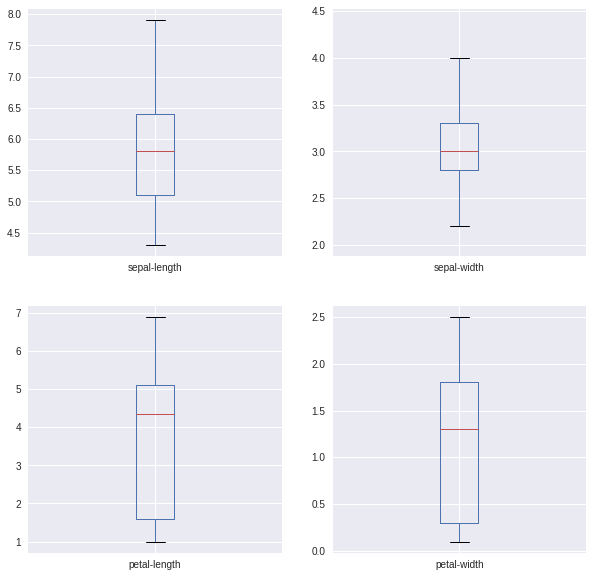

In [12]:
#box and wisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(10,10))
plt.show()

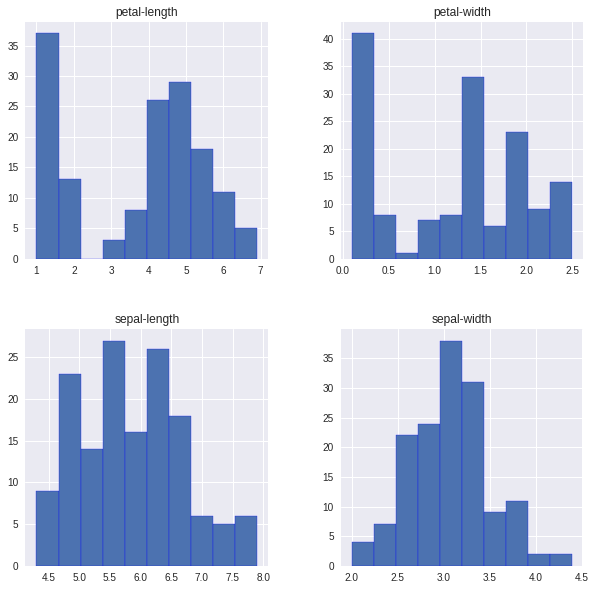

In [17]:
#histograms
dataset.hist(figsize=(10,10), edgecolor='b')
plt.show()

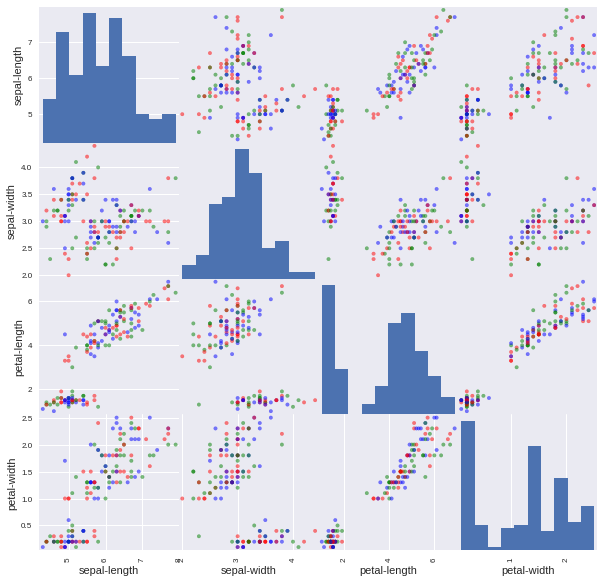

In [20]:
#scatter plot matrix
scatter_matrix(dataset, figsize=(10,10), c=['r','b','g'])
plt.show()

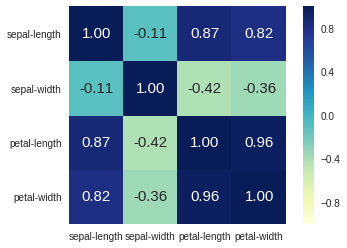

In [49]:
#correlation matrix
columns = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']
corr_matrix = dataset[columns].corr()
heatmap = sns.heatmap(corr_matrix,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 15},yticklabels=columns,xticklabels=columns,cmap='YlGnBu')

In the above correlation matrix, we are able to see the correlations between the attributes. Here we can see that there is a strong correlation between the Petal Length and Petal Width, versus the weak correlation between the Sepal Length and Sepal Width. This indicates that a species of Iris may be better identified by using its petal measurements as opposed to its sepal measurements.

In [78]:
#split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)


The above, we split the dataset into two, 80% will be used to train the models and 20% will be used as a validation.

In [79]:
#test options and evaluation metric
seed = 7
scoring = 'accuracy'

The metric of 'accuracy' will be used to evaluate the models. This is a ratio of the numver fof correctly predicted instances divided by the total number of instances in the dataset, then multiplied by 100 to provide us with a percentage. 

This is in preparation to use the **10-fold cross validation** to estimate accuracy.

**10-fold cross validation**: This splits the dataset into 10 parts, 9 to train on and 1 to test on. The process is repeated for all combinations of train-test splits.





Next, we are going to build 6 models; each to evaluate 6 different algorithms:
 * Logistic Regression(LR)
 * Linear Discriminant Analysis(LDA)
 * K-Nearest Neighbors(KNN)
 * Classification and Regression Trees (CART)
 * Gaussian Naive Bayes (NB)
 * Support Vector Machines (SVM)
 
This allows us to have a good mixture of simple linear (LR and LDA) and non-linear(KNN, CART, NB, and SVM) algorithms.

We will be resetting the random number seed before each run to ensure that the envaluation of each algorithm is performed using the exact same data splits, allowing for the results to be directly comparable. 

In [99]:
#spot check algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

#evaluate each model
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


From this, we see that ~~KNN~~ SVM looks to have the largest estimated accuracy score.

Next we will create a plot of the model evaluation results and compare the spread and the mean accuracy of each model. Note: there is a population off accuracy measures for each algorithm because each was evaluated 10 times... thus the 10 fold cross validation.


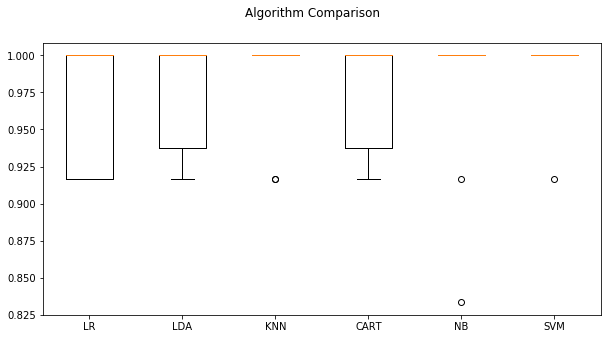

In [96]:
# Compare Algorithms
fig = plt.figure(figsize=(10, 5))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Since ~~KNN~~ SVM was the most accurate model that was tested, we will want to get an idea of the accuracy of the model on our validation set.

This will provide an independent final check on the accuracy of the best model. It is valuable to keep a validation set just in case an error is made during training, such as overfitting to the training set or a data leak.

In [100]:
#make predictions on validation dataset
#knn = KNeighborsClassifier()
#knn.fit(X_train, Y_train)
svm = SVC()
svm.fit(X_train, Y_train)
predictions = svm.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.933333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

    avg / total       0.94      0.93      0.93        30



Here we can see that the accuracy is ~~90%~~ 93.33%. The confusion matrix provides an indication of the three errors made. Finally, the classification report provides a breakdown of each class by precision, recall, f1-score, and support showing good results (granted the validation dataset was small).

### Referrences 

[Jason Brownlee's "Your First Machine Learning Project in Python Step-By-Step](http://machinelearningmastery.com/machine-learning-in-python-step-by-step/)
